In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss

# PS 04
David Gao
## 1 Part One: Data Exploration
#### 1.1 

In [3]:
airprice = pd.read_csv(r'beijing-seattle-airbnb-price.csv', sep='\t')
airprice.head(3)

,city,price
0,Beijing,401
1,Beijing,436
2,Beijing,479


#### 1.2

In [4]:
airprice.shape

(995, 2)

In [5]:
airprice.price.isna().sum()

0

In [6]:
airprice.city.value_counts()

Beijing    729
Seattle    266
Name: city, dtype: int64

There's 995 observations in total, 729 for Beijing, and 266 for Seattle. And there's no null value in data.
#### 1.3
#### 1.3.1

In [7]:
# summary for overall data
o_mean = airprice.price.mean()
o_median = airprice.price.median()
o_mode = airprice.price.mode()
o_std = airprice.price.std()
o_range = airprice.price.max() - airprice.price.min()

In [8]:
# summary for Beijing
beijing = airprice[airprice.city == "Beijing"].copy()
b_mean = beijing.price.mean()
b_median = beijing.price.median()
b_mode = beijing.price.mode()
b_std = beijing.price.std()
b_range = beijing.price.max() - beijing.price.min()

In [9]:
# summary for Seattle
seattle = airprice[airprice.city == "Seattle"].copy()
s_mean = seattle.price.mean()
s_median = seattle.price.median()
s_mode = seattle.price.mode()
s_std = seattle.price.std()
s_range = seattle.price.max() - seattle.price.min()

In [10]:
# table df
table = pd.DataFrame({'mean':[o_mean, b_mean, s_mean],\
                   'median':[o_median, b_median, s_median],\
                   'mdoe':[(o_mode)[0], (b_mode)[0], (s_mode)[0]],\
                   'standard deviation':[o_std, b_std, s_std],\
                   'range':[o_range, b_range, s_range]},\
                   index = ["Overall", "Beijing", "Seattle"])
table

,mean,median,mdoe,standard deviation,range
Overall,323.949749,267.0,197,275.097893,4067
Beijing,365.292181,296.0,197,274.220866,4020
Seattle,210.646617,149.0,1002,244.335794,972


#### 1.3.2

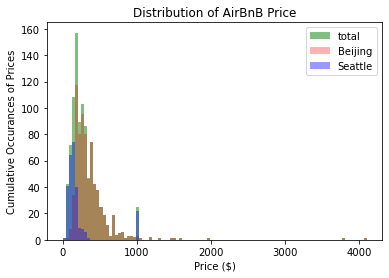

In [11]:
plt.hist(airprice.price, alpha = 0.5, bins = np.linspace(0,4100, 100),\
         label = "total", color = 'green');
plt.hist(beijing.price, alpha = 0.3, bins = np.linspace(0,4100, 100),\
         label = "Beijing", color = 'red');
plt.hist(seattle.price, alpha = 0.4, bins = np.linspace(0,4100, 100),\
         label = "Seattle", color = 'blue');

plt.title("Distribution of AirBnB Price")
plt.xlabel("Price ($)")
plt.ylabel("Cumulative Occurances of Prices")
plt.legend()
plt.show()

Reference: [Combined histogram](https://www.tutorialgateway.org/python-matplotlib-histogram/#:~:text=Whether%20it%20is%20one%20or%20more%2C%20Python%20matplotlib,to%20second%2C%20and%20green%20to%20the%20third%20histogram.)

#### 1.3.3

In [12]:
print("Beijing has more expensive AirBnBs, and difference of mean prices", 
      "between Beijing and Seattle is", b_mean - s_mean, ".")

Beijing has more expensive AirBnBs, and difference of mean prices between Beijing and Seattle is 154.6455645286055 .


#### 1.3.4
The distributions of prices are kind of right skewed. For the main part where most prices fall in, it is close to normal with little right skewed. However, there are some outliers on the right of the graph of all three data sets. 

## 2 Part Two: Data Transformation
#### 2.1

In [13]:
# create a new variable with log price
airprice["log_price"] = np.log(airprice.price)
beijing["log_price"] = np.log(beijing.price)
seattle["log_price"] = np.log(seattle.price)

#### 2.2

In [14]:
# summary for overall data
o_lmean = airprice.log_price.mean()
o_lmedian = airprice.log_price.median()
o_lmode = airprice.log_price.mode()
o_lstd = airprice.log_price.std()
o_lrange = airprice.log_price.max() - airprice.log_price.min()

In [15]:
# summary for Beijing
b_lmean = beijing.log_price.mean()
b_lmedian = beijing.log_price.median()
b_lmode = beijing.log_price.mode()
b_lstd = beijing.log_price.std()
b_lrange = beijing.log_price.max() - beijing.log_price.min()

In [16]:
# summary for Seattle
s_lmean = seattle.log_price.mean()
s_lmedian = seattle.log_price.median()
s_lmode = seattle.log_price.mode()
s_lstd = seattle.log_price.std()
s_lrange = seattle.log_price.max() - seattle.log_price.min()

In [17]:
# table df
table = pd.DataFrame({'log mean':[o_lmean, b_lmean, s_lmean],\
                   'log median':[o_lmedian, b_lmedian, s_lmedian],\
                   'log mdoe':[(o_lmode)[0], (b_lmode)[0], (s_lmode)[0]],\
                   'log standard deviation':[o_lstd, b_lstd, s_lstd],\
                   'log range':[o_lrange, b_lrange, s_lrange]},\
                   index = ["Overall", "Beijing", "Seattle"])
table

,log mean,log median,log mdoe,log standard deviation,log range
Overall,5.563792,5.587249,5.283204,0.641641,4.916813
Beijing,5.761401,5.690359,5.283204,0.489774,3.974205
Seattle,5.022227,5.003946,6.909753,0.695318,3.508556


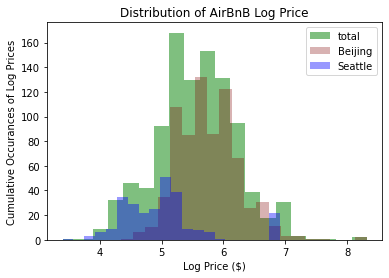

In [18]:
# plot of log data
plt.hist(airprice.log_price, alpha = 0.5, bins = 20,\
         label = "total", color = 'green');
plt.hist(beijing.log_price, alpha = 0.3, bins = 20,\
         label = "Beijing", color = 'maroon');
plt.hist(seattle.log_price, alpha = 0.4, bins = 20,\
         label = "Seattle", color = 'blue');

plt.title("Distribution of AirBnB Log Price")
plt.xlabel("Log Price ($)")
plt.ylabel("Cumulative Occurances of Log Prices")
plt.legend()
plt.show()

The shape of total and beijing looks like normal distribution, but data of Seattle is kind right skewed, with some outliers on the right.
#### 2.3

In [19]:
print("The difference of mean log prices between Beijing and Seattle is",\
       b_lmean - s_lmean, ".")

The difference of mean log prices between Beijing and Seattle is 0.7391737097578872 .


## 3 Part Three: Brute-Force Approach
#### 3.1

In [20]:
overall_mean = airprice.log_price.mean()
overall_std = airprice.log_price.std()
print("The overall mean is", overall_mean, "and the overall standard",
      "deviation is", overall_std, ".")

The overall mean is 5.563792307809865 and the overall standard deviation is 0.6416408826270507 .


#### 3.2

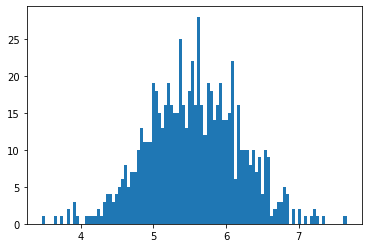

In [21]:
# simulation for Beijing
simulatedB = np.random.normal(5.563792, 0.641641, size=729)
# log_SB = np.log(simulatedB)
plt.hist(simulatedB, bins = 100);

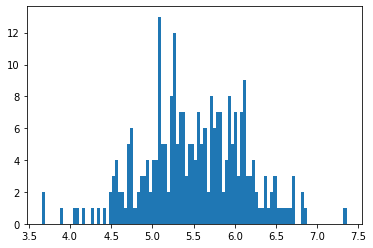

In [22]:
# simulation for Seattle
simulatedS = np.random.normal(5.563792, 0.641641, size=266)
# log_SS = np.log(simulatedS)
plt.hist(simulatedS, bins = 100);

In [23]:
SB_lmean = simulatedB.mean()
SS_lmean = simulatedS.mean()
print("The difference of means in simulated data,", SB_lmean - SS_lmean, ", is much smaller than the difference of means in original datasets.")

The difference of means in simulated data, 0.05414745361028839 , is much smaller than the difference of means in original datasets.


#### 3.3

In [24]:
SB_mean = np.exp(SB_lmean)
SS_mean = np.exp(SS_lmean)
print("The simulated difference in mean log-prices reported equate to", SB_mean - SS_mean, "in dollars.")


The simulated difference in mean log-prices reported equate to 13.663870036721136 in dollars.


#### 3.4
We the same mean and same variance as we want to investigate if the difference in mean price is only caused by single samplying.
#### 3.5

In [25]:
SB = []
SS = []
diff = []
for i in range(1100):
    simulatedB = np.random.normal(5.563792, 0.641641, size=729)
    SB.append(simulatedB)
    SB_lmean = simulatedB.mean()
    simulatedS = np.random.normal(5.563792, 0.641641, size=266)
    SS.append(simulatedS)
    SS_lmean = simulatedS.mean()
    diff.append(SB_lmean - SS_lmean)


#### 3.6

In [26]:
mean_diff = np.mean(diff)
print("The mean of all the differences between the simulated city mean",
      "log-price is", mean_diff, ".")

The mean of all the differences between the simulated city mean log-price is 0.003215201078239198 .


In [27]:
fDiff = np.asarray(diff)
idx1 = np.argmin(np.abs(fDiff - mean_diff))
idx1

552

In [28]:
dollar_diff1 = np.exp(np.mean(SB[idx1])) - np.exp(np.mean(SS[idx1]))
print("The mean of all differences is roughly equivalent to", dollar_diff1,
      "in dollars.")

The mean of all differences is roughly equivalent to 0.8324069594158345 in dollars.


#### 3.7

In [29]:
idx2 = np.argmax(np.abs(fDiff - mean_diff))
diff_max = np.abs(diff[idx2])
dollar_diff2 = np.abs(np.exp(np.mean(SB[idx2])) - np.exp(np.mean(SS[idx2])))
print("The largest difference of mean log-prices is", diff_max,
      "And the difference in standard price is", dollar_diff2, ".")

The largest difference of mean log-prices is 0.17054905444334256 And the difference in standard price is 45.13602653014425 .


#### 3.8

In [40]:
threshold_high = np.percentile(diff, 99.5)
threshold_high

0.11816694155560484

In [41]:
threshold_low = np.percentile(diff, 0.5)
threshold_low

-0.11087013171808116

In [42]:
print("The CI is [", threshold_low, ",", threshold_high,\
      "], and the observed difference of log-price, 0.7392,",\
    "does not fall into this interval.")

The CI is [ -0.11087013171808116 , 0.11816694155560484 ], and the observed difference of log-price, 0.7392, does not fall into this interval.


#### 3.9

In [43]:
idx_low = np.argmin(np.abs(fDiff - threshold_low))
idx_high = np.argmin(np.abs(fDiff - threshold_high))
CI_low = np.exp(np.mean(SB[idx_low])) - np.exp(np.mean(SS[idx_low]))
CI_high = np.exp(np.mean(SB[idx_high])) - np.exp(np.mean(SS[idx_high]))
print("The CI is [", CI_low, ",", CI_high,\
      "], and the observed difference of log-price, 154.65,",\
    "does not fall into this interval.")

The CI is [ -29.466077873554497 , 30.43125797432799 ], and the observed difference of log-price, 154.65, does not fall into this interval.


#### 3.10
As the real difference of price does not fall into the 99% conficence interval, we can say the difference in AirBnB prices between cities is not due to sample variation, as the probability for sample variation to cause this large difference is extremely low.
## 4  Part Four: t-test
#### 4.1

In [34]:
SE = np.sqrt(b_lstd**2/729 + s_lstd**2/266)
print("The standare error is", SE, ".")

The standare error is 0.04633138016822794 .


#### 4.2

In [38]:
# from table, with df = 250 (the closest one to real df = 265)
# df = 265 is choosen from min of 266 seattle data and 729 beijing data
# and 0.01 two tail probability.
t_cr = 2.596 
mu = b_lmean - s_lmean
print("The 99% confidence interval is (", mu - t_cr*SE, mu + t_cr*SE,
      ").")

The 99% confidence interval is ( 0.6188974468411674 0.859449972674607 ).


Reference: [t-table](https://media.cheggcdn.com/media/cde/cdea3619-59fe-4fb8-8299-d689c32a6799/phpYtWTJR.png)
#### 4.3
Based on the conficence interval, we can reject $H_0$ as $H_0 = 0$ does not falls into this confidence interval.
#### 4.4

In [44]:
t = mu/SE
print("t-value is", t, ".")

t-value is 15.954061957014193 .


#### 4.5
This large t-value is more likely to appear between 95% and 98% CI and when the df is low, that is when the sample size is small, which mean the likelihood that such a t-value happends just by random chance is low.
## 5 Canned t-test Function
#### 5.1

In [49]:
ss.ttest_ind(beijing.log_price, seattle.log_price, equal_var=False)

Ttest_indResult(statistic=15.954061957013737, pvalue=7.439441804547704e-44)

#### 5.2
Beijing is more expensive than Seattle, and all of my three methods, simulation, 99% CI, t-value and python's t-text agree.